<a href="https://colab.research.google.com/github/SBShimm/Datathon/blob/main/Netflix_jumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎥 Netflix EDA & Visualization 

## (1) 데이터 가져오기

In [22]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline 

In [36]:
file_dir = '/content/drive/MyDrive/dataton/netflix_titles.csv'
rating_dir = '/content/drive/MyDrive/dataton/Folder/Datathon/Dataset/Netflix_IMDB.csv'
data = pd.read_csv(file_dir)
df_rating = pd.read_csv(rating_dir)

In [24]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
df_rating.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [59]:
data_by_rating = df_rating.sort_values(by = 'IMDB',ascending=False)
data_by_rating.head(20)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,genre
6010,6010,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,9.4,"[Crime TV Shows, TV Dramas, TV Thrillers]"
2558,2558,s2520,TV Show,Avatar: The Last Airbender,NaN,"Zach Tyler, Mae Whitman, Jack De Sena, Dee Bra...",United States,"May 15, 2020",2007,TV-Y7,3 Seasons,"Classic & Cult TV, Kids' TV, TV Action & Adven...",Siblings Katara and Sokka wake young Aang from...,9.3,"[Classic & Cult TV, Kids' TV, TV Action & Adve..."
3119,3119,s3072,TV Show,Reply 1988,NaN,"Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...",South Korea,"January 1, 2020",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Take a nostalgic trip back to the late 1980s t...,9.2,"[International TV Shows, Korean TV Shows, Roma..."
688,688,s681,TV Show,The Last Dance,NaN,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,"June 19, 2021",2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,9.2,[Docuseries]
3995,3995,s3939,TV Show,Our Planet,NaN,David Attenborough,"United States, United Kingdom","April 5, 2019",2019,TV-PG,1 Season,"Docuseries, Science & Nature TV",Experience our planet's natural beauty and exa...,9.2,"[Docuseries, Science & Nature TV]"
1915,1915,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom","October 4, 2020",2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu...",9.1,[Documentaries]
3431,3431,s3382,TV Show,The Untamed,NaN,"Sean Xiao, Wang Yibo, Zoey Meng, Xuan Lu, Yu B...",China,"October 25, 2019",2019,TV-14,1 Season,"International TV Shows, TV Action & Adventure,...","In a magical world of inter-clan rivalry, two ...",9.1,"[International TV Shows, TV Action & Adventure..."
7365,7365,s7296,TV Show,Leyla and Mecnun,Onur Ünlü,"Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...",Turkey,"April 15, 2017",2014,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Destiny brings Mecnun and Leyla together as ne...,9.1,"[International TV Shows, Romantic TV Shows, TV..."
1781,1781,s1756,TV Show,Leah Remini: Scientology and the Aftermath,NaN,"Leah Remini, Mike Rinder",United States,"November 1, 2020",2018,TV-14,3 Seasons,Docuseries,Former Scientology members share detailed acco...,9.0,[Docuseries]
5163,5163,s5097,TV Show,Fullmetal Alchemist: Brotherhood,Yasuhiro Irie,"Romi Park, Rie Kugimiya, Megumi Takamoto, Shin...",Japan,"January 1, 2018",2010,TV-14,5 Seasons,"Anime Series, International TV Shows",After both suffer physical damage – brothers E...,9.0,"[Anime Series, International TV Shows]"


In [44]:
len(set(df_rating["listed_in"]))

514

In [52]:
def genere(what):
    if what == 'all':
        genere = df_rating.listed_in.value_counts()
    else:
        genere = df_rating[df_rating['type'] == what].listed_in.value_counts()
    gener = {}
    
    for idx, val in genere.items():
        l = idx.split(',')
        for i in l:
            i = i.strip()
            if i in gener.keys():
                d = {}
                d[i] = val + gener[i]
                gener.update(d)
            else:
                d = {i:val}
                gener.update(d)
    theme, count = [],[]
    
    for idx, val in gener.items():
        theme.append(idx)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genere':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp

In [54]:
tv_genere = genere('TV Show')
tv_genere

,genere,count
0,TV Shows,16
1,Classic & Cult TV,28
2,Stand-Up Comedy & Talk Shows,56
3,TV Thrillers,59
4,Teen TV Shows,69
5,TV Horror,76
6,TV Sci-Fi & Fantasy,85
7,Science & Nature TV,92
8,TV Mysteries,101
9,Korean TV Shows,155


In [56]:
mov_genere = genere('Movie')
mov_genere

,genere,count
0,Movies,58
1,Faith & Spirituality,66
2,Cult Movies,71
3,Anime Features,71
4,LGBTQ Movies,103
5,Classic Movies,116
6,Sports Movies,220
7,Sci-Fi & Fantasy,245
8,Stand-Up Comedy,343
9,Horror Movies,358


In [50]:
df_rating.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB,genre
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",7.4,[Documentaries]
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",6.3,"[International TV Shows, TV Dramas, TV Mysteries]"
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,"[Crime TV Shows, International TV Shows, TV Ac..."
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,"[Docuseries, Reality TV]"
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,"[International TV Shows, Romantic TV Shows, TV..."


In [39]:
data.info(), df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8877 entries, 0 to 8876
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8877 non-null   int64  
 1   show_id    

(None, None)

총 12개의 column과 8807개의 row로 이뤄진 데이터입니다.  
각 column은
* show_id : 컨텐츠의 id 인덱스
* type : movie or TV show
* title : 제목
* director : 감독
* cast : 출연진
* country : 제작 국가
* date_added : 추가된 날짜
* release_year : 개봉년도
* rating : 관람등급
* duration : 시즌 / 러닝타임
* listed_in : 분류 카테고리
* description : 시놉시스

결측치 확인

In [26]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [27]:
data.loc[data.index == 85]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
85,s86,TV Show,Pokémon Master Journeys: The Series,NaN,"Ikue Otani, Sarah Natochenny, Zeno Robinson, C...",NaN,"September 10, 2021",2021,TV-Y7,1 Season,"Anime Series, Kids' TV",As Ash battles his way through the World Coron...


In [28]:
data.loc[data.index == 11]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."


In [ ]:
plt.figure(figsize = (20, 18))
sns.heatmap(data.corr(), annot=True, cmap='Purples', linewidths=0.2)


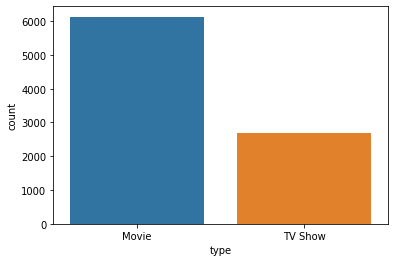

In [31]:
sns.countplot(x='type' , data = data)

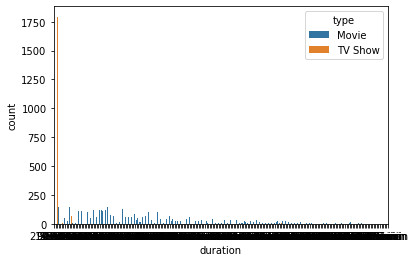

In [35]:
sns.countplot(x='duration',hue = 'type' , data = data)

## (2) 데이터 전처리

## (3) 데이터 시각화

## (4) 회고

참고문헌
[1] genre 나누기 https://www.kaggle.com/code/bhuvanchennoju/netflix-is-awesome-why-see-here